## **Introduction**

**Data Source:** https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/data

Sabermetrics is the empirical analysis of baseball data. Specifically it uses baseball statistics to measure in-game activity.  In the modern era many every team has statisticians and analysts who use Sabermetrics to compare players to each other.  However teams did not adopting Sabermetrics until 1990 when the Oakland A's began using Sabermetrics under their then general manager Sandy Alderson and his successor Billy Beane. The Oakland A's, who are a small market team, began to consistently compete with the bigger market teams even though their payroll was less than half the size compared to teams like the New York Yankees, Atlanta Braves, and Boston Red Sox.  This qualitative approach gained nation wide recognition when Michael Lewis wrote a book called "Moneyball: The Art of Winning an Unfair Game" (my favorite book as teenager) which later turned into a movie starring Brad Pitt.

In my capstone project I wanted to do some basic sabermetrics specifically with offensive data and answer three specific questions.

** 1) Which statistics are most correlated with winning? <br>
2) Have these offensive statistics changed over time? Have teams improved or declined over the time period. <br>
3) Is one league better than the other league? <br> **

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats

%matplotlib inline
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


## **Data Set Description**

In this dataset I will be looking at Major League Baseball data from 1962 to 2012.  I want to target offensive data so I want to focus on these three statistics

1) On Base Percentage (**OBP**) <br> 
2) Batting Average (**BA**) <br>
3) Slugging Percentage (**SLG**) <br>

The data also includes team wins, whether they made the playoffs or not, what league they are in, their runs scored (RS), and runs allowed (RA).  Every row is represented by a team, the season year, what league they are in, and other team performance statistics.  In playoffs, 1 is representing making the playoffs and 0 is not making the playoffs.

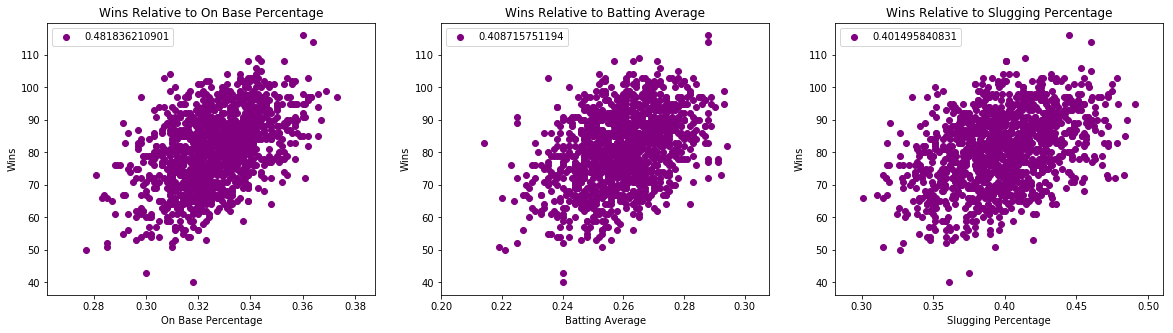

In [2]:
plt.figure(figsize = (20,5))

plot_1_corr = df['OBP'].corr(df['W'])
plot_2_corr = df['BA'].corr(df['W'])
plot_3_corr = df['SLG'].corr(df['W'])

plt.subplot(1,3,1)
plt.scatter(
    x=df['OBP'],
    y=df['W'],
    color='purple')
plt.title('Wins Relative to On Base Percentage')
plt.ylabel('Wins')
plt.xlabel('On Base Percentage')
plt.legend([plot_1_corr], loc='upper left')

plt.subplot(1,3,2)
plt.scatter(
    x=df['BA'],
    y=df['W'],
    color='purple')
plt.title('Wins Relative to Batting Average')
plt.ylabel('Wins')
plt.xlabel('Batting Average')
plt.legend([plot_2_corr], loc='upper left')

plt.subplot(1,3,3)
plt.scatter(
    x=df['SLG'],
    y=df['W'],
    color='purple')
plt.title('Wins Relative to Slugging Percentage')
plt.ylabel('Wins')
plt.xlabel('Slugging Percentage')
plt.legend([plot_3_corr], loc='upper left')
plt.show()

To answer my first questions I created three scatter plots comparing wins to OBP, BA, and SLG. I then found the r value for every scatter plot.  As you can you see from the data  **On Base Percentage, Batting Average, and Slugging Percentage are all correlated with winning** which is what I would have hypothesized based on intution.  But **the strongest r value is OBP with .48** The other r values are close to OBP with BA at .41 and SLG at .40.

Ttest_indResult(statistic=11.478492324393658, pvalue=1.1886978882776244e-26)
Ttest_indResult(statistic=13.825477522905643, pvalue=1.9171645396285808e-35)
Ttest_indResult(statistic=12.807132017099811, pvalue=9.521223812739395e-32)
0.26680737704918056
0.011113783113204163
0.2574119433198382
0.012632669998232213
0.33731967213114716
0.013794015329442523
0.3236174089068824
0.014022876789310383
0.41906967213114793
0.028889544848125358
0.3919757085020236
0.032052673895484184


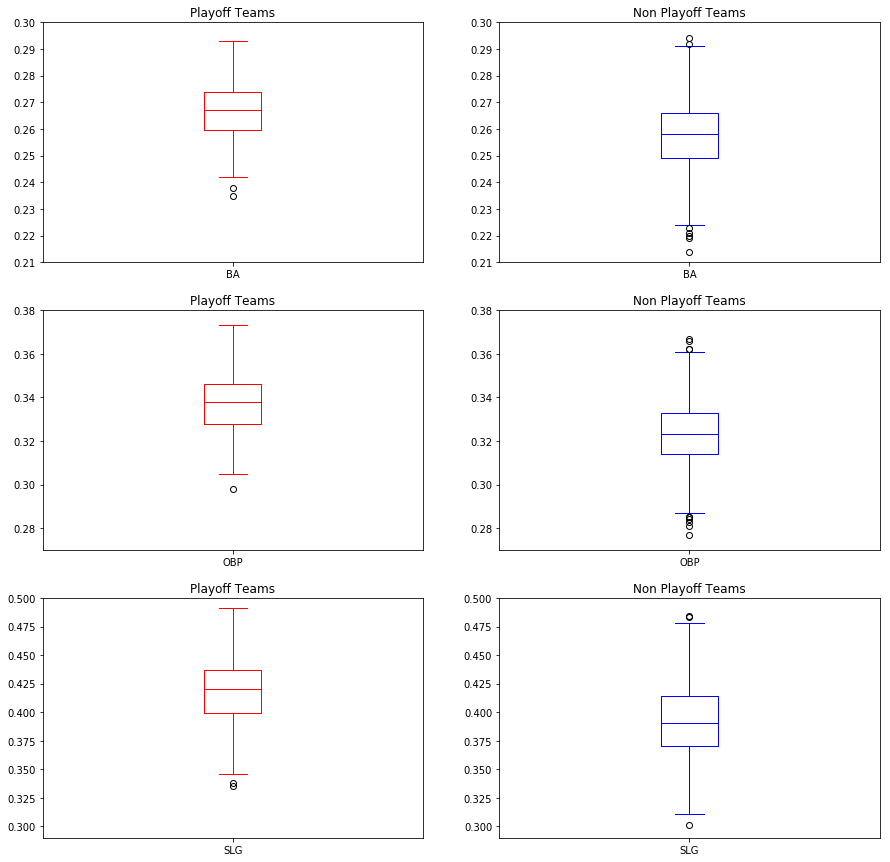

In [3]:
x1=df[(df['Playoffs'] == 1) & (df['BA'] < 1) & (df['BA'] > 0)]['BA']

x2=df[(df['Playoffs'] == 0) & (df['BA'] < 1) & (df['BA'] > 0)]['BA']

x3=df[(df['Playoffs'] == 1) & (df['OBP'] < 1) & (df['OBP'] > 0)]['OBP']

x4=df[(df['Playoffs'] == 0) & (df['OBP'] < 1) & (df['OBP'] > 0)]['OBP']

x5=df[(df['Playoffs'] == 1) & (df['SLG'] < 1) & (df['SLG'] > 0)]['SLG']

x6=df[(df['Playoffs'] == 0) & (df['SLG'] < 1) & (df['SLG'] > 0)]['SLG']

plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
x1.plot(kind='box', color = 'red', title = 'Playoff Teams', ylim = (.21,.3))

plt.subplot(3,2,2)
x2.plot(kind='box', color = 'blue', title = 'Non Playoff Teams', ylim = (.21,.3))

plt.subplot(3,2,3)
x3.plot(kind='box', color = 'red', title = 'Playoff Teams', ylim = (.27,.38))

plt.subplot(3,2,4)
x4.plot(kind='box', color = 'blue', title = 'Non Playoff Teams', ylim = (.27,.38))

plt.subplot(3,2,5)
x5.plot(kind='box', color = 'red', title = 'Playoff Teams', ylim = (.29,.5))

plt.subplot(3,2,6)
x6.plot(kind='box', color = 'blue', title = 'Non Playoff Teams', ylim = (.29,.5))

plt.show

print(ttest_ind(x1, x2, equal_var=False))
print(ttest_ind(x3, x4, equal_var=False))
print(ttest_ind(x5, x6, equal_var=False))
print(np.mean(x1))
print(np.std(x1))
print(np.mean(x2))
print(np.std(x2))
print(np.mean(x3))
print(np.std(x3))
print(np.mean(x4))
print(np.std(x4))
print(np.mean(x5))
print(np.std(x5))
print(np.mean(x6))
print(np.std(x6))

In this box plot I plotted playoff teams against non playoff teams.  Then I ran a t test. Playoff teams have a higher mean in all of the stats looked at compared to non playoff teams.  The mean differences are all statistically significant as you can see from the p value the number is basically 0. **I conclude the most important statistic is OBP due to OBP being the highest r value in the scatter plots and the lowest p value in the t test between playoff teams and non playoff teams.**  The evidence for a difference in offensive stats between playoff and non-playoff is strongest in the case of OBP.

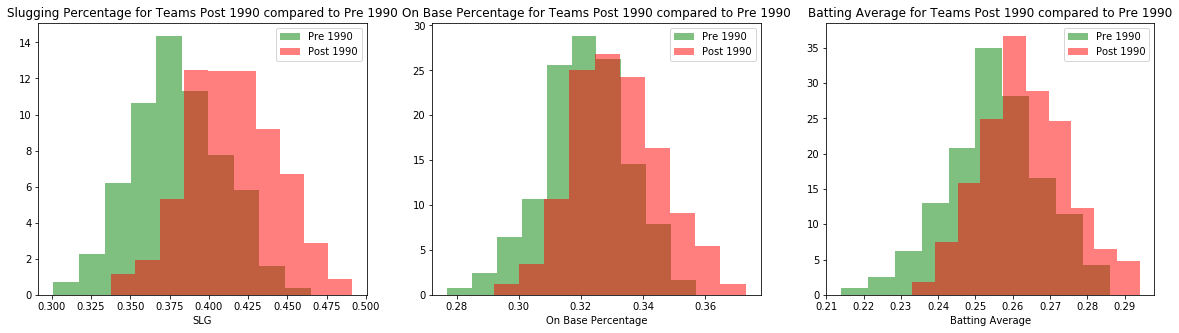

Ttest_indResult(statistic=-20.915498487540848, pvalue=2.381883212493906e-83)
Ttest_indResult(statistic=-13.688289964523932, pvalue=8.4383125452827087e-40)
Ttest_indResult(statistic=-11.507147304279798, pvalue=3.6615524893113802e-29)


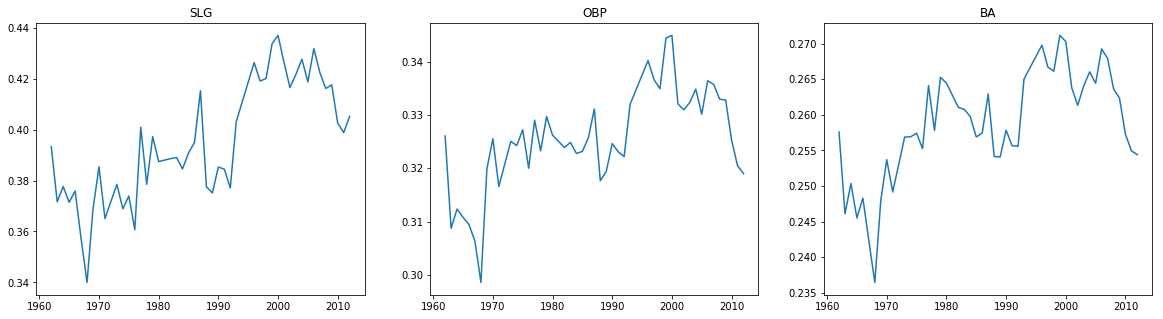

In [4]:
pre_1990 = df[(df['Year'] < 1990)]
post_1990 = df[(df['Year'] > 1989)]
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(pre_1990['SLG'], normed=True, color='green', alpha =.5)
plt.hist(post_1990['SLG'], normed =True, color='red', alpha =.5)
plt.title('Slugging Percentage for Teams Post 1990 compared to Pre 1990')
plt.xlabel('SLG')
plt.legend(['Pre 1990', 'Post 1990'])

plt.subplot(1,3,2)
plt.hist(pre_1990['OBP'], normed=True, color='green', alpha =.5)
plt.hist(post_1990['OBP'], normed =True, color='red', alpha =.5)
plt.title('On Base Percentage for Teams Post 1990 compared to Pre 1990')
plt.xlabel('On Base Percentage')
plt.legend(['Pre 1990', 'Post 1990'])

plt.subplot(1,3,3)
plt.hist(pre_1990['BA'], normed=True, color='green', alpha =.5)
plt.hist(post_1990['BA'], normed =True, color='red', alpha =.5)
plt.title('Batting Average for Teams Post 1990 compared to Pre 1990')
plt.xlabel('Batting Average')
plt.legend(['Pre 1990', 'Post 1990'])

plt.show()

print(ttest_ind(pre_1990['SLG'], post_1990['SLG'], equal_var=False))
print(ttest_ind(pre_1990['OBP'], post_1990['OBP'], equal_var=False))
print(ttest_ind(pre_1990['BA'], post_1990['BA'], equal_var=False))

mlb_seasons = df[df['Year'] > 1950]
mlb_seasons_grouped = mlb_seasons.groupby('Year').mean()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(mlb_seasons_grouped['SLG'])
plt.title('SLG')

plt.subplot(1,3,2)
plt.plot(mlb_seasons_grouped['OBP'])
plt.title('OBP')

plt.subplot(1,3,3)
plt.plot(mlb_seasons_grouped['BA'])
plt.title('BA')

plt.show()

To my answer my second question the first thing I did was separate the teams by pre 1990 to post 1990. Then a created a box plot with the OBP, BA, and SLG for pre 1990 teams and post 1990 teams. This is due to the fact that the Oakland A's began adopting Sabermetrics in the 1990s.  As you can see just from looking at the histogram I created that the post 1990 teams are better in every category.  Another observation is that the pvalues are even smaller when comparing post 1990 teams to pre 1990 teams. In the line graph what I did was get the average yearly OBP, BA, and SLG and then I graphed it.  You can definitely see an upward trend even as we get closer and closer to the present. **I can conclude that there has been a change in all the offensive statistics and there has been an improvement as the years go by.** Recently there has been a downward trend in the most recent years so maybe teams might be getting better at improving their player choice with pitching and defensive metrics. Also Major Lague Baseball had a steroid scandal in the 1990s with players like Barry Bonds, Sammy Sosa, and Mark McGwire which could be a reason why there was a huge jump from the 1990s up to the 2000s.

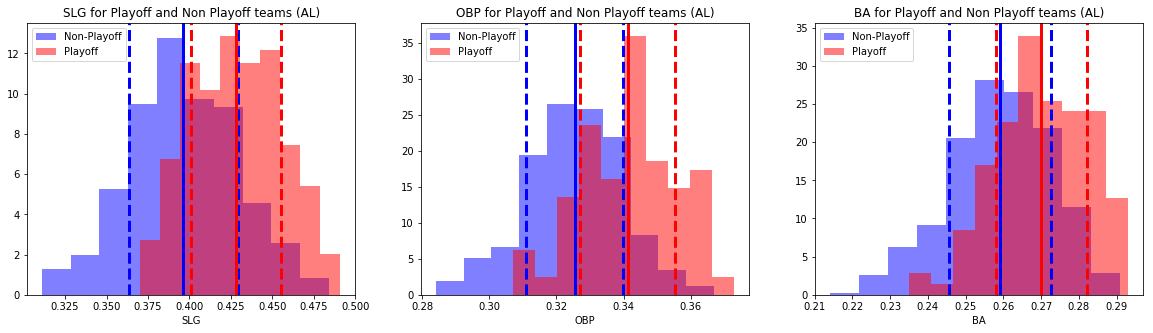

Ttest_indResult(statistic=-10.94037917972506, pvalue=1.91774044233481e-22)
Ttest_indResult(statistic=-11.011389095017398, pvalue=4.5216899051317077e-22)
Ttest_indResult(statistic=-8.7014951057559173, pvalue=1.1306621169293841e-15)


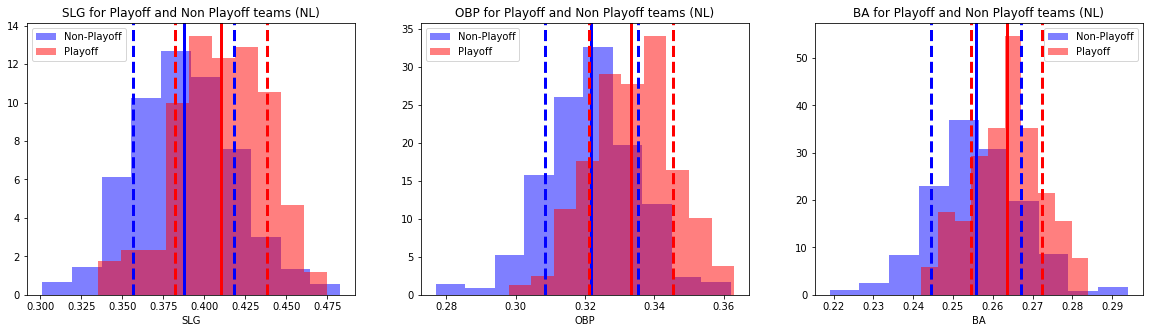

Ttest_indResult(statistic=-7.8719415538559767, pvalue=2.1671891734739091e-13)
Ttest_indResult(statistic=-9.1419127778103455, pvalue=7.2787654607983916e-17)
Ttest_indResult(statistic=-8.196325353070149, pvalue=1.7990295301733208e-14)


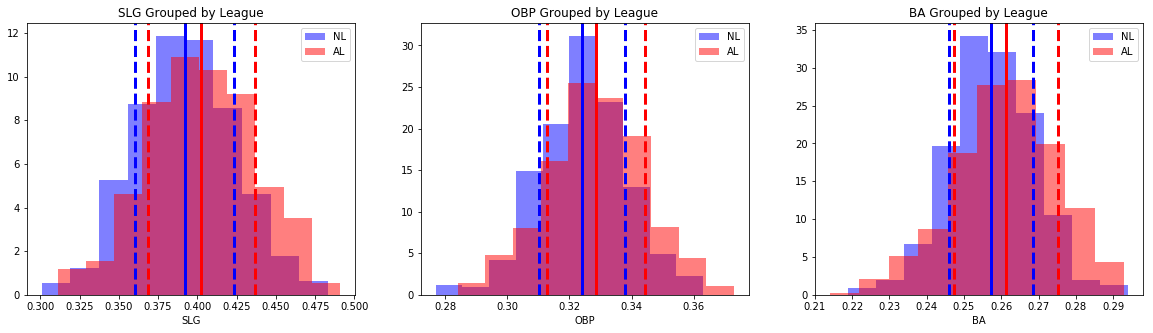

Ttest_indResult(statistic=-5.6544785202004864, pvalue=1.944322756023052e-08)
Ttest_indResult(statistic=-5.2321669864989611, pvalue=1.9726357072137838e-07)
Ttest_indResult(statistic=-5.6038578064783939, pvalue=2.6082941545379399e-08)


In [5]:
national = df[(df['League'] == 'NL')]
american = df[(df['League'] == 'AL')]
national_playoffs = national[(national['Playoffs'] == 1)]
national_no = national[(national['Playoffs'] == 0)]
american_playoffs = american[(american['Playoffs'] == 1)]
american_no = american[(american['Playoffs'] == 0)]

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(american_no['SLG'], normed=True, color='blue', alpha =.5)
plt.hist(american_playoffs['SLG'], normed =True, color='red', alpha =.5)
plt.title('SLG for Playoff and Non Playoff teams (AL)')
plt.xlabel('SLG')
plt.legend(['Non-Playoff', 'Playoff'])
plt.axvline(np.mean(american_no['SLG']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american_no['SLG'] + np.std(american_no['SLG'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_no['SLG'] - np.std(american_no['SLG'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_playoffs['SLG']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american_playoffs['SLG'] + np.std(american_playoffs['SLG'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_playoffs['SLG'] - np.std(american_playoffs['SLG'])),color = 'red', linestyle='dashed', linewidth=3)


plt.subplot(1,3,2)
plt.hist(american_no['OBP'], normed=True, color='blue', alpha =.5)
plt.hist(american_playoffs['OBP'], normed =True, color='red', alpha =.5)
plt.title('OBP for Playoff and Non Playoff teams (AL)')
plt.xlabel('OBP')
plt.legend(['Non-Playoff', 'Playoff'])
plt.axvline(np.mean(american_no['OBP']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american_no['OBP'] + np.std(american_no['OBP'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_no['OBP'] - np.std(american_no['OBP'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_playoffs['OBP']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american_playoffs['OBP'] + np.std(american_playoffs['OBP'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_playoffs['OBP'] - np.std(american_playoffs['OBP'])),color = 'red', linestyle='dashed', linewidth=3)

plt.subplot(1,3,3)
plt.hist(american_no['BA'], normed=True, color='blue', alpha =.5)
plt.hist(american_playoffs['BA'], normed =True, color='red', alpha =.5)
plt.title('BA for Playoff and Non Playoff teams (AL)')
plt.xlabel('BA')
plt.legend(['Non-Playoff', 'Playoff'])
plt.axvline(np.mean(american_no['BA']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american_no['BA'] + np.std(american_no['BA'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_no['BA'] - np.std(american_no['BA'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_playoffs['BA']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american_playoffs['BA'] + np.std(american_playoffs['BA'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american_playoffs['BA'] - np.std(american_playoffs['BA'])),color = 'red', linestyle='dashed', linewidth=3)

plt.show()

print(ttest_ind(american_no['SLG'], american_playoffs['SLG'], equal_var=False))
print(ttest_ind(american_no['OBP'], american_playoffs['OBP'], equal_var=False))
print(ttest_ind(american_no['BA'], american_playoffs['BA'], equal_var=False))

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(national_no['SLG'], normed=True, color='blue', alpha =.5)
plt.hist(national_playoffs['SLG'], normed =True, color='red', alpha =.5)
plt.title('SLG for Playoff and Non Playoff teams (NL)')
plt.xlabel('SLG')
plt.legend(['Non-Playoff', 'Playoff'])
plt.axvline(np.mean(national_no['SLG']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national_no['SLG'] + np.std(national_no['SLG'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_no['SLG'] - np.std(national_no['SLG'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_playoffs['SLG']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national_playoffs['SLG'] + np.std(national_playoffs['SLG'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_playoffs['SLG'] - np.std(national_playoffs['SLG'])),color = 'red', linestyle='dashed', linewidth=3)


plt.subplot(1,3,2)
plt.hist(national_no['OBP'], normed=True, color='blue', alpha =.5)
plt.hist(national_playoffs['OBP'], normed =True, color='red', alpha =.5)
plt.title('OBP for Playoff and Non Playoff teams (NL)')
plt.xlabel('OBP')
plt.legend(['Non-Playoff', 'Playoff'])
plt.axvline(np.mean(national_no['OBP']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national_no['OBP'] + np.std(national_no['OBP'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_no['OBP'] - np.std(national_no['OBP'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_playoffs['OBP']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national_playoffs['OBP'] + np.std(national_playoffs['OBP'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_playoffs['OBP'] - np.std(national_playoffs['OBP'])),color = 'red', linestyle='dashed', linewidth=3)


plt.subplot(1,3,3)
plt.hist(national_no['BA'], normed=True, color='blue', alpha =.5)
plt.hist(national_playoffs['BA'], normed =True, color='red', alpha =.5)
plt.title('BA for Playoff and Non Playoff teams (NL)')
plt.xlabel('BA')
plt.legend(['Non-Playoff', 'Playoff'])
plt.axvline(np.mean(national_no['BA']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national_no['BA'] + np.std(national_no['BA'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_no['BA'] - np.std(national_no['BA'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_playoffs['BA']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national_playoffs['BA'] + np.std(national_playoffs['BA'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national_playoffs['BA'] - np.std(national_playoffs['BA'])),color = 'red', linestyle='dashed', linewidth=3)


plt.show()

print(ttest_ind(national_no['SLG'], national_playoffs['SLG'], equal_var=False))
print(ttest_ind(national_no['OBP'], national_playoffs['OBP'], equal_var=False))
print(ttest_ind(national_no['BA'], national_playoffs['BA'], equal_var=False))

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(national['SLG'], normed=True, color='blue', alpha =.5)
plt.hist(american['SLG'], normed =True, color='red', alpha =.5)
plt.title('SLG Grouped by League')
plt.xlabel('SLG')
plt.legend(['NL', 'AL'])
plt.axvline(np.mean(national['SLG']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national['SLG'] + np.std(national['SLG'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national['SLG'] - np.std(national['SLG'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american['SLG']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american['SLG'] + np.std(american['SLG'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american['SLG'] - np.std(american['SLG'])),color = 'red', linestyle='dashed', linewidth=3)


plt.subplot(1,3,2)
plt.hist(national['OBP'], normed=True, color='blue', alpha =.5)
plt.hist(american['OBP'], normed =True, color='red', alpha =.5)
plt.title('OBP Grouped by League')
plt.xlabel('OBP')
plt.legend(['NL', 'AL'])
plt.axvline(np.mean(national['OBP']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national['OBP'] + np.std(national['OBP'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national['OBP'] - np.std(national['OBP'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american['OBP']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american['OBP'] + np.std(american['OBP'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american['OBP'] - np.std(american['OBP'])),color = 'red', linestyle='dashed', linewidth=3)

plt.subplot(1,3,3)
plt.hist(national['BA'], normed=True, color='blue', alpha =.5)
plt.hist(american['BA'], normed =True, color='red', alpha =.5)
plt.title('BA Grouped by League')
plt.xlabel('BA')
plt.legend(['NL', 'AL'])
plt.axvline(np.mean(national['BA']),color = 'blue', linestyle='solid', linewidth=3)
plt.axvline(np.mean(national['BA'] + np.std(national['BA'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(national['BA'] - np.std(national['BA'])),color = 'blue', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american['BA']),color = 'red', linestyle='solid', linewidth=3)
plt.axvline(np.mean(american['BA'] + np.std(american['BA'])),color = 'red', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(american['BA'] - np.std(american['BA'])),color = 'red', linestyle='dashed', linewidth=3)

plt.show()

print(ttest_ind(national['SLG'], american['SLG'], equal_var=False))
print(ttest_ind(national['OBP'], american['OBP'], equal_var=False))
print(ttest_ind(national['BA'],american['BA'], equal_var=False))

In these histograms what I did was separate the groups by leagues.  Then I separated American League (**AL**) playoff teams to AL non playoff teams. Then I did the same for the National League (**NL**) which created 4 different groups, NL Playoff teams, NL Non-Playoff teams, AL Playoff teams, AL Non-Playoff teams. Then I created a histogram graphing SLG, OBP, and BA between AL Playoff teams and AL Non-Playoff teams.  Then I compared SLG, OBP, and BA between NL Playoff and Non-Playoff teams.  Lastly I compared NL Playoff teams to AL Playoff teams.  What we saw was a significant difference in all 3 categories.  The first two histograms did not surprise me but the significant difference between NL Playoff teams and AL Playoff teams in all 3 categories did. Then I realized that the American League has a position in the batting line up called the Designated Hitter (**DH**). This position takes the place of the pitcher who has to be able to pitch and bat. The DH on the other hand can specialize in hitting as he does not play defense. Overall **all 3 of these comparison show statistically significant difference when comparing each group.**

## Further Research

**1) Look at defensive statistics**

In my analysis I only looked at offensive statistics but I would like to look at pitching statistics and see its affect on wins.  I'd like to answer the same questions but look at stats like strikeouts (**K**), earned run average (**ERA**), and walks plus hits per inning pitched (**WHIP**). 

**2) How do stadiums affect offensive statistics**

Some stadiums are known as hitter friendly like Colorado's Coors Field because of the higher altitude which allows the ball to travel farther.  Then there are unfriendly stadiums like Boston's Fenway Park due to the infamous "Green Monster" which is a wall that stands almost 40 feet tall in the left field of the stadium. Teams who get to play in these stadiums more often might have their statistics inflated or deflated. 

**3) Look at payrolls from everyone team and see who can achieve the most success with the least amount of money**

This is because the inspiration of this capstone project is based on the Oakland A's teams managed by Billy Beane.  Beane had one of the smallest payrolls in the league but he could compete with teams that were spending up to 3x more money than he did.  It would be interesting to see which teams got the most wins for each dollar spent.